## Abstract

This project aims to describe the spread of SARS-CoV-2 in the state of Pernambuco, Brazil over the period of 01/02/2021 until 31/01/2022, further predicting it until 31/07/2022.

Compared with the project's draft, we're using a further modified SEIIRDV model, now working with separate vaccinated groups according to the amount of applied doses and variable contact rates to simulate social stress.

It's also important to note that the contact and vaccinated rates, alongside the mean time for recovery, are now properly referenced instead of simply assumed.

## Introduction and Objectives

The Covid-19 pandemic started by the end of 2019, with an outbreak caused by Sars-Cov-2 in Wuhan, Hubei Province, China. Despite having mostly overcome the original strain, we're still having to deal with its variants, namely Gamma, Delta and Omicron.

Currently, the most relevant variety is Omicron, which, despite being characterized by a low death rate, has a very high infection rate, bringing forth a huge amount of infected individuals, and, consequently, a death count that can't be ignored. Estimating the behavior of a virus is a prevention mean that can help avoiding a tragedy, signaling risks at the same time it can show a glimmer of hope to when this all will end.

In this project, we will try to explain the current condition of Covid-19 in Pernambuco, Brazil, as well as predict the pandemic's state by the end of July 2022. For such, we'll be using statistic and calculus knowledge to establish a reasonable epidemiological model, making use of Python libraries (NumPy, SciPy) to solve ODEs and make predictions based on the results, which are graphically represented with the aid of Matplotlib. Consequently, it will be an important practice of mathematical modeling for a real world problem.

## Methodology

The following is the ODE system we've elaborated thus far:

$$
\begin{aligned}
    &\frac{dS}{dt} = \frac{-\beta_I \cdot SS \cdot S \cdot (I_a + I_s)}{N} - 
                     \frac{\beta_E \cdot SS \cdot S \cdot E}{N} - 
                     \lambda(t) \cdot S + \frac{R}{\tau_{re}} \\
    &\frac{dE}{dt} = \frac{\beta_I \cdot SS \cdot S \cdot (I_a + I_s)}{N} + 
                     \frac{\beta_E \cdot SS \cdot S \cdot E}{N} - \frac{E}{\tau} + 
                     \frac{\sigma_1 \cdot V_1 \cdot \beta_E \cdot SS \cdot E}{N} +
                     \frac{\sigma_2 \cdot V_2 \cdot \beta_E \cdot SS \cdot E}{N} +
                     \frac{\sigma_3 \cdot V_3 \cdot \beta_E \cdot SS \cdot E}{N}\\
    &\frac{dI_a}{dt} = \frac{\rho \cdot E}{\tau} - 
                       \rho \cdot \gamma \cdot I_a \\
    &\frac{dI_s}{dt} = (1 - \rho) \cdot E/\tau - 
                       (1-\rho) \cdot (\gamma + \mu) \cdot I_s \\
    &\frac{dR}{dt} = \gamma \cdot I_a \cdot \rho + 
                     \gamma \cdot I_s \cdot (1 - \rho) -
                     \lambda_1(t) \cdot R \frac{\sigma_1}{\sigma_1 + \sigma_2 + \sigma_3} -
                     \lambda_2(t) \cdot R \frac{\sigma_2}{\sigma_1 + \sigma_2 + \sigma_3} -
                     \lambda_3(t) \cdot R \frac{\sigma_3}{\sigma_1 + \sigma_2 + \sigma_3} -
                     \frac{R}{\tau_{re}} \\
    &\frac{dD}{dt} = \mu \cdot I_s \cdot (1 - \rho) \\
    &\frac{dV_1}{dt} = \lambda_1(t) \cdot S + 
                       \lambda_1(t) \cdot R \frac{\sigma_1}{\sigma_1 + \sigma_2 + \sigma_3} -
                       \frac{\sigma_1 \cdot V_1 \cdot \beta_E \cdot SS \cdot E}{N} -
                       \lambda_2(t) \cdot V_1 \\
    &\frac{dV_2}{dt} = \lambda_2(t) \cdot S + 
                       \lambda_2(t) \cdot R \frac{\sigma_2}{\sigma_1 + \sigma_2 + \sigma_3} -
                       \frac{\sigma_2 \cdot V_2 \cdot \beta_E \cdot SS \cdot E}{N} -
                       \lambda_3(t) \cdot V_2 \\
    &\frac{dV_3}{dt} = \lambda_3(t) \cdot S + 
                       \lambda_3(t) \cdot R \frac{\sigma_3}{\sigma_1 + \sigma_2 + \sigma_3} -
                       \frac{\sigma_3 \cdot V_3 \cdot \beta_E \cdot SS \cdot E}{N}
                
\end{aligned}
$$

Data was extracted considering the first day analyzed, that is, 1st February 2021 (01/02/2021):
- N (population); taken from [1];
- $\beta_I$ (contact rate for infected), $\beta_E$ (contact rate for exposed); obtained from [3];
- $CFR$ (Case Fatality Ratio); calculated from data in [1] (total cases and death count in Brazil) using the formula in [2]. It was assumed that the $CFR$ value for Pernambuco was the same as for Brazil;
- $\tau$ (mean incubation period), $\tau_r$ (mean time for recover) and $\tau_d$ (mean time for death); obtained from [3];
- $\tau_{re}$ (mean time for reinfection); extracted from [7];
- $\gamma$ (mean recovery rate), $\mu$ (mean death rate); based on $CFR$, $\tau_r$ and $\tau_d$;
- $I_0$ (initial infected count); extracted from [4], considering that the actively infected population for that day was the amount of confirmed cases until then subtracted by death and recovery counts. Considering a small enough superposition, this data is taken as sufficiently accurate. Doesn't appear in the equation, but is used to determine $I_a$ and $I_s$ alongside $\rho$;
- $\rho$; taken from [5]. We'll be considering that 34.6% of the cases are asymptomatic;
- $\lambda_1(t), \lambda_2(t), \lambda_3(t)$; vaccination functions, showing how many people were vaccinated since $(t-1)$, relative to the total population. Data used to make them is available in [8].
- $\sigma_1, \sigma_2, \sigma_3$; inefficacy of the first, second and reinforcement doses, respectively.
    - Values for the first part of the project (until 31/01/2022) were extracted from [9] by taking the efficacy mean of present data;
    - Values for the second part of the project were extracted from [10] ($\sigma_1$, $\sigma_2$) and [11] ($\sigma_3$).

- $SS$ (social stress); explained below.

### Social Stress

One of the new parameters added to the model, tightly related to $\beta_I$ and $\beta_E$ to indicate variations in contact rates based on time periods and infections' growth tendencies.

Previously, social stress was meant to be a new group, but we found a way to make it affect the behavior of the other groups as a parameter.

The increase in cases generated from increased contact rates is followed by a drop in said contact rates due to increased respect to social distancing and security measures. When those are applied for prolongated periods of time, social stress increases and so they're once again followed by increased contact rates, thus completing a cycle.

As such, this tendency led us to believe in a wave-like behavior. The function we believe to be the most adequated is as follows:
$$ f(t) = \sin\left(\frac{\pi \cdot t}{90}\right) + 1.5$$

A graphical representation of the function can be seen in Fig. 1.

The added value of 1.5 is to translate the function from $(-1, 1)$ to $(0.5, 2.5)$ in such a way to multiply contact rates by values we found reasonable.

The period chosen was 180 days, related to festivities in both the middle and start/end of the year.

In [1659]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

plt.style.use('ggplot')

In [1660]:
# Total population of Pernambuco (as of 2021)
N = 9674793

# Initial number of infected
I0 = 21452

# Percentage of asymptomatic cases
rho = 0.346

# Initial number of infected (asymptomatic and symptomatic), recovered, exposed, dead and vaccinated individuals (01/02/2021)
Ia0, Is0, R0, E0, D0, V10, V20, V30 = I0 * rho, I0 * (1 - rho), 0, 0, 0, 0, 0, 0

# Everyone else, S0, is susceptible to infection initially
S0 = N - Ia0 - Is0 - R0 - E0 - D0 - V10 - V20 - V30

# Contact rate for infected and exposed individuals
beta_I = 0.46
beta_E = beta_I * 0.09 

# Case fatality ratio
cfr = 0.0242

# Average time for incubation, recovery, death and reinfection
tau = 5.1
tau_r, tau_d = 16, 13.8
tau_re = 180

# Mean recovery and death rates
gamma = (1 - cfr) / tau_r
mu =  cfr / tau_d

# Vaccine inefficacy according to the amount of doses taken
sigma_1, sigma_2, sigma_3 = 0.57, 0.192, 0

# A grid of time points (in days) for both time periods
t = np.linspace(0, 364 + 180, 365 + 180)

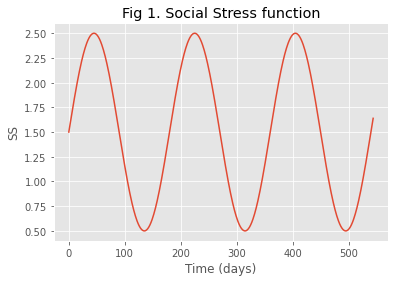

In [1661]:
social_stress = lambda x: math.sin(x * math.pi / 90) + 1.5

ss = list()

for i in range(len(t)):
    ss.append(social_stress(i))

plt.title('Fig 1. Social Stress function')
plt.xlabel('Time (days)')
plt.ylabel('SS')
plt.plot(t, ss)
plt.show()

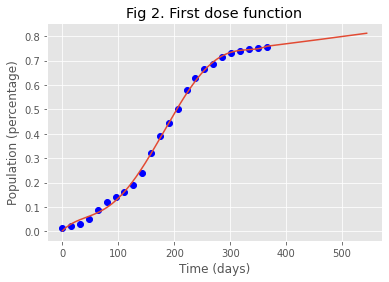

In [1662]:
from scipy.interpolate import UnivariateSpline

vac1 = list()
vac_dates = np.linspace(0, 365, 24)

# From [8] (data extracted every ~15 days):
vac1.append(118733)
vac1.append(229060)
vac1.append(305012)
vac1.append(471077)
vac1.append(864211)
vac1.append(1156508)
vac1.append(1372295)
vac1.append(1561620)
vac1.append(1844966)
vac1.append(2300570)
vac1.append(3099056)
vac1.append(3767873)
vac1.append(4276014)
vac1.append(4842162)
vac1.append(5590053)
vac1.append(6066810)
vac1.append(6441105)
vac1.append(6629011)
vac1.append(6914523)
vac1.append(7049524)
vac1.append(7162343)
vac1.append(7229387)
vac1.append(7283286)
vac1.append(7318863)

for i in range(len(vac1)):
    vac1[i] /= N
    vac1[i] = round(vac1[i], 3)

plt.plot(vac_dates, vac1, 'bo')

# Spline of the data
spl = UnivariateSpline(vac_dates, vac1, k=5)

# Linear prediction starting after the 365th day
vac1_prediction = list()
vac1_prediction.append(spl(365))
for i in range(1, 180):
    vac1_prediction.append(vac1_prediction[i-1] + vac1_prediction[i-1] * spl.derivatives(350)[1])

# Join both in a single function
pcwise = np.piecewise(t, [t < 365, t >= 365], [lambda x: spl(x), lambda x: vac1_prediction])

plt.title('Fig 2. First dose function')
plt.xlabel('Time (days)')
plt.ylabel('Population (percentage)')
plt.plot(t, pcwise)
plt.show()

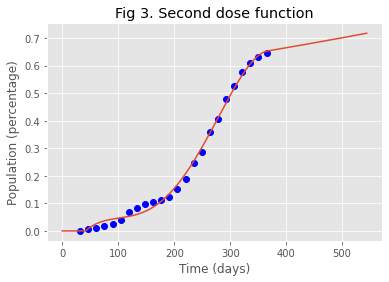

In [1663]:
vac2 = list()
vac_dates = np.linspace(32, 365, 24)

# From [8] (data extracted every ~15 days):
# First day with second dose applied: 04/02/2021
vac2.append(1962)
vac2.append(69870)
vac2.append(111622)
vac2.append(169102)
vac2.append(240794)
vac2.append(375273)
vac2.append(665472)
vac2.append(792664)
vac2.append(931058)
vac2.append(1006570)
vac2.append(1078714)
vac2.append(1199681)
vac2.append(1475072)
vac2.append(1828097)
vac2.append(2367706)
vac2.append(2781179)
vac2.append(3469363)
vac2.append(3919862)
vac2.append(4629764)
vac2.append(5077855)
vac2.append(5558641)
vac2.append(5915763)
vac2.append(6101309)
vac2.append(6238812)

for i in range(len(vac2)):
    vac2[i] /= N
    vac2[i] = round(vac2[i], 3)

plt.plot(vac_dates, vac2, 'bo')

# Spline of the data
spl2 = UnivariateSpline(vac_dates, vac2, k=4)

# Linear prediction starting after the 365th day
vac2_prediction = list()
vac2_prediction.append(spl2(365))
for i in range(1, 180):
    vac2_prediction.append(vac2_prediction[i-1] + vac2_prediction[i-1] * spl2.derivatives(365)[1])

# Join both in a single function
pcwise2 = np.piecewise(t, [t < 32, t >= 32, t >= 365], [lambda x: 0, lambda x: spl2(x), lambda x: vac2_prediction])
for i in range(len(pcwise2)):
    if(pcwise2[i] < 0):
        pcwise2[i] = 0

plt.title('Fig 3. Second dose function')
plt.xlabel('Time (days)')
plt.ylabel('Population (percentage)')
plt.plot(t, pcwise2)
plt.show()

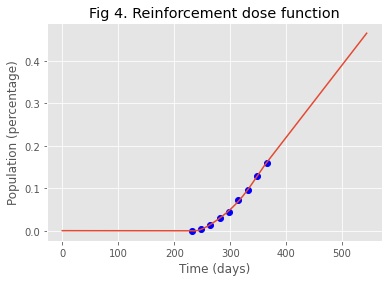

In [1664]:
vac3 = list()
vac_dates = np.linspace(231, 365, 9)

# From [8] (data extracted every ~15 days):
# First day with reinfocement dose applied: 20/09/2021
vac3.append(3135)
vac3.append(27191)
vac3.append(132022)
vac3.append(296605)
vac3.append(440061)
vac3.append(698990)
vac3.append(917155)
vac3.append(1248573)
vac3.append(1544103)

for i in range(len(vac3)):
    vac3[i] /= N
    vac3[i] = round(vac3[i], 3)

plt.plot(vac_dates, vac3, 'bo')

# Spline of the data
spl3 = UnivariateSpline(vac_dates, vac3, k=5)

# Linear prediction starting after the 365th day
vac3_prediction = list()
vac3_prediction.append(spl3(365))
for i in range(1, 180):
    vac3_prediction.append(vac3_prediction[i-1] + spl3.derivatives(365)[1])

# Join both in a single function
pcwise3 = np.piecewise(t, [t < 231, t >= 231, t >= 365], [lambda x: 0, lambda x: spl3(x), lambda x: vac3_prediction])

plt.title('Fig 4. Reinforcement dose function')
plt.xlabel('Time (days)')
plt.ylabel('Population (percentage)')
plt.plot(t, pcwise3)
plt.show()

In [1665]:
# Make the arrays describe the increase from the past day instead of total vaccinated count 
for i in range(len(pcwise) - 1, 0, -1):
    pcwise[i] -= pcwise[i-1]
    pcwise2[i] -= pcwise2[i-1]
    pcwise3[i] -= pcwise3[i-1]

In [1666]:
# Vaccination functions

def vaccination1(t):
    return pcwise[math.floor(t)]

def vaccination2(t):
    return pcwise2[math.floor(t)]

def vaccination3(t):
    return pcwise3[math.floor(t)]

In [1667]:
def deriv(y, t):
    S, Ia,Is, R, E, D, V1, V2, V3 = y
    dSdt = -beta_I*ss[math.floor(t)]*S*(Ia + Is)/N \
           -beta_E*ss[math.floor(t)]*S*E/N - vaccination1(t) * S \
           +R/(tau_re)
    dEdt = +beta_I*ss[math.floor(t)]*S*(Ia + Is)/N \
           +beta_E*ss[math.floor(t)]*S*E/N - E/tau \
           +sigma_1 * V1 * beta_E * ss[math.floor(t)] * E / N \
           +sigma_2 * V2 * beta_E * ss[math.floor(t)] * E / N \
           +sigma_3 * V3 * beta_E * ss[math.floor(t)] * E / N
    dIadt = +rho*E/tau \
            -rho*gamma*Ia
    dIsdt = +(1 - rho)*E/tau \
            -(1-rho)*(gamma + mu)*Is
    dRdt = +gamma * Ia * rho + gamma * Is * (1 - rho) \
           -R/(tau_re) \
           -vaccination1(t) * R * (sigma_1 / (sigma_1 + sigma_2 + sigma_3)) \
           -vaccination2(t) * R * (sigma_2 / (sigma_1 + sigma_2 + sigma_3)) \
           -vaccination2(t) * R * (sigma_3 / (sigma_1 + sigma_2 + sigma_3))
    dDdt = +mu * Is * (1 - rho)
    dV1dt = +vaccination1(t) * S \
            -vaccination2(t) * V1 \
            -sigma_1 * V1 * beta_E * ss[math.floor(t)] * E / N \
            +vaccination1(t) * R * (sigma_1 / (sigma_1 + sigma_2 + sigma_3))
    dV2dt = +vaccination2(t) * V1 \
            -vaccination3(t) * V2 \
            -sigma_2 * V2 * beta_E * ss[math.floor(t)] * E / N \
            +vaccination2(t) * R * (sigma_2 / (sigma_1 + sigma_2 + sigma_3))
    dV3dt = vaccination3(t) * V2 \
            -sigma_3 * V3 * beta_E * ss[math.floor(t)] * E / N \
            +vaccination2(t) * R * (sigma_3 / (sigma_1 + sigma_2 + sigma_3))
# Join both in a single function
    return dSdt, dIadt, dIsdt, dRdt, dEdt, dDdt, dV1dt, dV2dt, dV3dt

In [1668]:
# Initial conditions vector for the first part
y0 = S0, Ia0, Is0, R0, E0, D0, V10, V20, V30

# Integrate the SIR equations over the time grid, 0 <= t < 364.
t = np.linspace(0, 364, 365)
ret = odeint(deriv, y0, t)
S, Ia,Is, R, E, D, V1, V2, V3 = ret.T

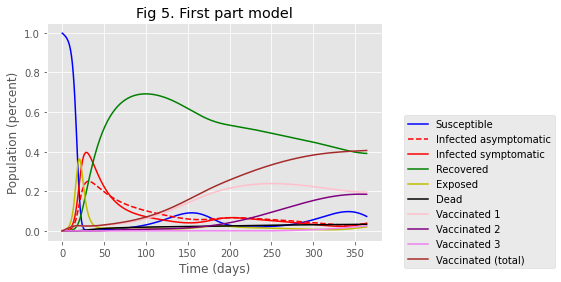

In [1669]:
plt.plot(t, S/N, 'b', label='Susceptible')
plt.plot(t, Ia/N, 'r--', label='Infected asymptomatic')
plt.plot(t, Is/N, 'r', label='Infected symptomatic')
plt.plot(t, R/N, 'g', label='Recovered')
plt.plot(t, E/N, 'y', label='Exposed')
plt.plot(t, D/N, 'black', label='Dead')
plt.plot(t, V1/N, 'pink', label='Vaccinated 1')
plt.plot(t, V2/N, 'purple', label='Vaccinated 2')
plt.plot(t, V3/N, 'violet', label='Vaccinated 3')
plt.plot(t, (V1 + V2 + V3)/N, 'brown', label='Vaccinated (total)')
plt.title('Fig 5. First part model')
plt.xlabel('Time (days)')
plt.ylabel('Population (percent)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

In [1670]:
# Initial conditions vector for the second part
S0, Ia0, Is0, R0, E0, D0, V10, V20, V30 = S[364] + R[364], Ia[364], Is[364], 0, E[364], D[364], V1[364], V2[364], V3[364]
y0 = S0, Ia0, Is0, R0, E0, D0, V10, V20, V30

# Update parameters due to new variant
sigma_1, sigma_2, sigma_3 = 1, 0.67,  0.05

# Integrate the SIR equations over the time grid, 365 <= t < 544.
t = np.linspace(365, 544, 180)
ret = odeint(deriv, y0, t)
S, Ia, Is, R, E, D, V1, V2, V3 = ret.T

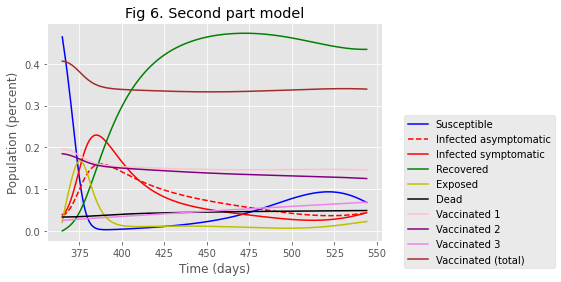

In [1671]:
plt.plot(t, S/N, 'b', label='Susceptible')
plt.plot(t, Ia/N, 'r--', label='Infected asymptomatic')
plt.plot(t, Is/N, 'r', label='Infected symptomatic')
plt.plot(t, R/N, 'g', label='Recovered')
plt.plot(t, E/N, 'y', label='Exposed')
plt.plot(t, D/N, 'black', label='Dead')
plt.plot(t, V1/N, 'pink', label='Vaccinated 1')
plt.plot(t, V2/N, 'purple', label='Vaccinated 2')
plt.plot(t, V3/N, 'violet', label='Vaccinated 3')
plt.plot(t, (V1 + V2 + V3)/N, 'brown', label='Vaccinated (total)')
plt.title('Fig 6. Second part model')
plt.xlabel('Time (days)')
plt.ylabel('Population (percent)')
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

## Results and Discussions

The description of the pandemic through the first analyzed year was graphically represented in Fig. 5, whereas the analysis of the next 180 days can be seen in Fig. 6.

### Vaccination
In contrast with previously presented models, we're considering that vaccinated individuals aren't completely immune to infection, correctly reflecting reality. However, when dealing with the original strain, we considered that the reinforcement dose grants full immunity, whereas the first and second don't. 

Unlike planned before, the vaccinated individuals didn't get infected with different contact and death rates, which would add a lot of complexity to the model. To deal with the issue of reinserting vaccinated individuals back into the infected loop in a more simple manner, we successfully did so with different rates according to the dose's (in)efficacy.

Regarding the vaccination functions, $\lambda_i(t)$, they were approximated with a spline until the 365th day from [8]'s data, whereas their behavior was predicted for the next 180 days by taking into account a linear growth based on the derivative of a value close to the end of the first part. Those values can be seen in Fig. 2, Fig. 3 and Fig. 4. We did that since the first and second doses practically reached the plateau of a sigmoid function, and so were expected to have a nearly linear growth from there. For the third dose, we took in account a more steep variation since the collected data didn't show clear signs of stabilization.

It was also taken into account that the second and reinforcement dose still weren't being applied as the analyzed period started, and so their values were 0 until we reached the first day they started being applied.

### Omicron
To indicate the arrival of a new variant during the start of 2022, we partitioned the analysis after the first 365 days, transfering all the recovered individuals back to the susceptible group given that we're considering their immunity to the new variant as null. Although this behavior is particularly unnatural, bringing it to a less trusty scientific base, it was the solution we found. All other groups where kept as they were in the last day of the first part.

One of the reasons that was done was to deal with the recovered group, which had a tendency to prevail over the other ones due to $\tau_{re}$ being constant, not adapting itself well to the arrival of new variants.

Furthermore, different efficacy rates for the vaccines were adopted, given that they don't give as much protection when dealing with the new variant.

## Conclusion


The obtained curves were satisfactorily similar to real data, giving us confidence in the models and parameters adopted by our work. However, it's important to highlight the existing problem related to the appearance of new variants.

Our model shows that, until 31/07/2022, new peaks aren't expect given current variants, a conclusion that was incentivated by the population's notable vaccination rate for at least two doses.

Analysing the obtained peaks, our model shows that the originally obtained peak was bigger than the second, even if a "reset" was assumed in the natural immunity for the second one. This shows the impact of vaccination and the resistance that comes from it, dampening the peak and evading bigger catastrophes.

At the same time, comparing with the peaks seen in the real world, the Omicron variant, even with an increased infection rate, didn't cause a continuous problem, quickly dropping after its peak. The main reason for this is vaccination, due to the immunization derived from it managing to reduce the impact of a variant that's more infectuous than its previous counterparts.

Our model isn't able to guarantee that a new variant could or not generate a new peak in the future. However, it's able to soothe us regarding the threat of the currently predominant variants, especially with the population more and more immunized with multiple doses.

## References
[1] [Vacinômetro - Brasil](https://www.worldometers.info/coronavirus/country/brazil/)

[2] [WHO - Estimating mortality from COVID-19](https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19)

[3] [Estimative of real number of infections by COVID-19 on Brazil and possible scenarios](https://www.medrxiv.org/content/10.1101/2020.05.03.20052779v3)

[4] [Painel de casos de doença pelo coronavírus 2019 (COVID-19) em Pernambuco, no Brasil e no Mundo.](https://dados.seplag.pe.gov.br/apps/corona.html#geral)

[5] [Estimating the Asymptomatic Ratio of 2019 Novel Coronavirus onboard the Princess Cruises Ship, 2020](https://www.medrxiv.org/content/10.1101/2020.02.20.20025866v1.full.pdf)

[6] [IBGE - Panorama Pernambuco](https://cidades.ibge.gov.br/brasil/pe/panorama)

[7] [OPAS - Perguntas frequentes: vacinas contra a COVID-19](https://www.paho.org/pt/vacinas-contra-covid-19/perguntas-frequentes-vacinas-contra-covid-19#tab-22475-4)

[8] [SES PE - Boletim Epidemiológico Covid-19](http://portal.saude.pe.gov.br/boletim-epidemiologico-covid-19)

[9] [CNN Brasil - Efetividade da 1ª dose reduz de 50% para 35% contra variante Delta, diz estudo](https://www.cnnbrasil.com.br/saude/efetividade-da-1-dose-reduz-de-50-para-35-contra-variante-delta-diz-estudo/)

[10] [Estadão - As vacinas contra covid-19 podem parar a variante ômicron?](https://summitsaude.estadao.com.br/desafios-no-brasil/as-vacinas-contra-covid-19-podem-parar-a-variante-omicron/)

[11] [EL PAÍS - Terceira dose multiplica a imunidade, de acordo com estudo sobre população revacinada em Israel](https://brasil.elpais.com/sociedad/2021-09-15/terceira-dose-multiplica-a-imunidade-de-acordo-com-estudo-sobre-populacao-revacinada-em-israel.html)